In [15]:
import os
import pickle 
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [16]:
person = "001"
test_folder = os.path.join("database_raw","test",{person})
tags = ["Live", "Spoof"]
data_folder = "database_serilased"

In [17]:
test_data = []
count = 0
for tag in tags:
    files_folder = os.path.join(test_folder,tag)
    files = os.listdir(files_folder)
    for file in files:
        try:
            img = cv2.imread(os.path.join(files_folder,file))
            test_data.append([img,count])

        except Exception:
            print(f"Fail to load {file}")
    count += 1  

In [18]:
X = []
y = []
random.shuffle(test_data)
for features, label in test_data:
    X.append(features)
    y.append(label)

img_size = len(X[0]) 
X = np.array(X).reshape(-1,img_size,img_size,3)
X.shape

(959, 300, 300, 3)

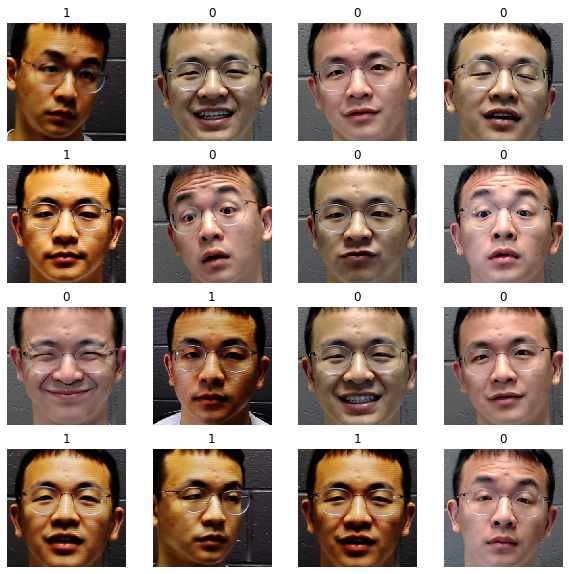

In [19]:
%matplotlib inline

plt.figure(figsize=(10,10))
nrows = 4
ncols = 4
start = 4
X_sample = X[start:start +nrows*ncols]
i = start
for img in X_sample:
    plt.subplot(nrows,ncols,i-start+1)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{y[i]}")
    i += 1

In [20]:
pickle_out = open(os.path.join(data_folder,person,f"X{person}Test.pickle"),"wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out = open(os.path.join(data_folder,person,f"y{person}Test.pickle"),"wb")
pickle.dump(y,pickle_out)
pickle_out.close()